### GRIP : The Sparks Foundation
#### Data Science& Business Analytics Intern
#### Author:Maksuda Rahman Fariya
#### Task:‘Exploratory Data Analysis’ on dataset ‘Indian Premier League'

#### Importing Pandas libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
data_m = pd.read_csv("matches.csv")

In [3]:
data_m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data_d = pd.read_csv("deliveries.csv")
data_d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
data_m.shape

(756, 18)

In [6]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
team = data_m['winner'].value_counts()
team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [8]:
data_m['winner'].replace(to_replace = 'Rising Pune Supergiant',value='Rising Pune Supergiant',inplace = True)
team = data_m['winner'].value_counts()
team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [9]:
len(team)

15

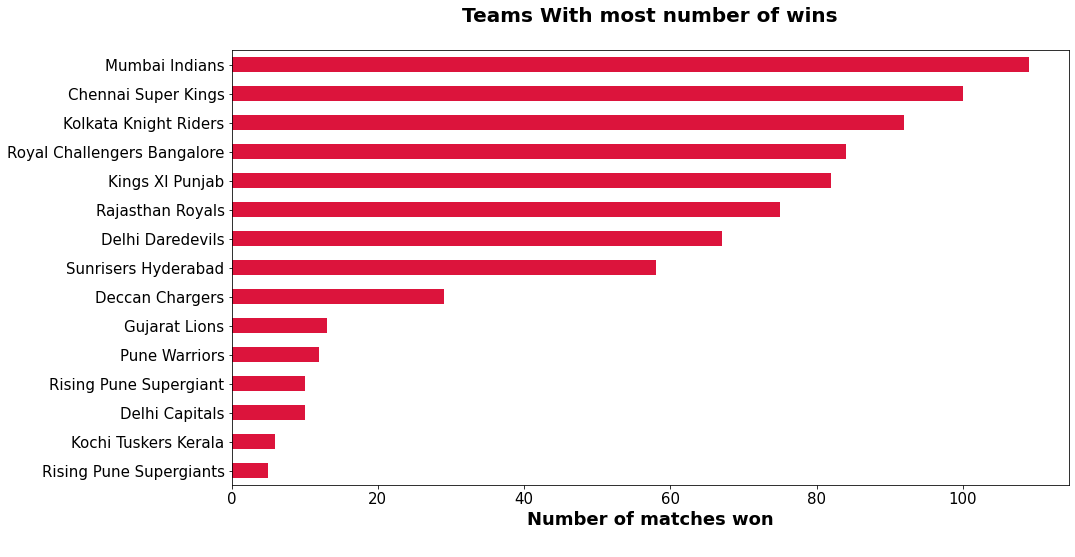

In [10]:
team = team.plot.barh(figsize=(15,8),color='crimson',fontsize=15)
plt.style.use('dark_background')
team.set_title('Teams With most number of wins\n',fontsize=20,fontweight='bold')
team.set_xlabel('Number of matches won\n',fontsize=18,fontweight='bold')
team.invert_yaxis()
for i in team.patches:
    team.text(i.get_width()+0.5,i.get_y()+.35,i.get_width(),fontsize=15,fontweight='bold',color='white')

In [11]:
data_m['win_by_runs'].max()

146

In [12]:
data_m.iloc[data_m['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [13]:
data_m['win_by_wickets'].max()

10

In [14]:
data_m.iloc[data_m['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [15]:
more_10wickets = data_m[data_m.win_by_wickets==10]
more_10wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


In [16]:
winners = data_m[['season','winner']]
winners

,season,winner
0,2017,Sunrisers Hyderabad
1,2017,Rising Pune Supergiant
2,2017,Kolkata Knight Riders
3,2017,Kings XI Punjab
4,2017,Royal Challengers Bangalore
...,...,...
751,2019,Mumbai Indians
752,2019,Mumbai Indians
753,2019,Delhi Capitals
754,2019,Chennai Super Kings


In [17]:
team_with_most_title={}
for i in sorted(winners.season.unique()):
    team_with_most_title[i] = winners[winners.season == i]['winner'].tail(1).values[0]
season_winner = pd.Series(team_with_most_title)
season_winner = pd.DataFrame(season_winner,columns=['Season_winner'])
    

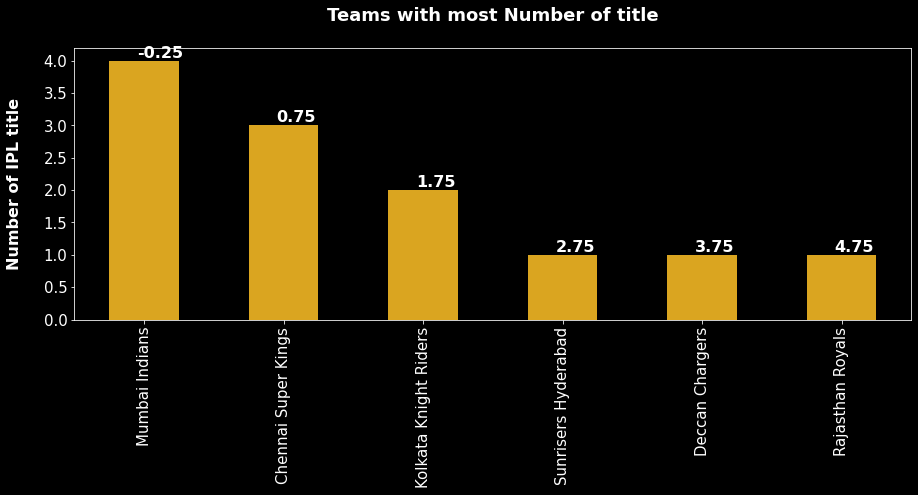

In [18]:
season_winner = season_winner['Season_winner'].value_counts().plot(kind='bar',figsize=(15,5),color='goldenrod',fontsize=15)
plt.style.use('dark_background')
season_winner.set_title('Teams with most Number of title\n',fontsize=18,fontweight='bold')
season_winner.set_ylabel('Number of IPL title\n',fontsize=16,fontweight='bold')
for i in season_winner.patches:
    season_winner.text(i.get_x()+.20,i.get_height()+0.05,i.get_x(),fontsize=16,fontweight='bold',color='white')

In [19]:
most_toss_win = data_m['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [20]:
data_m['toss_winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiant',inplace=True)
most_toss_win = data_m['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

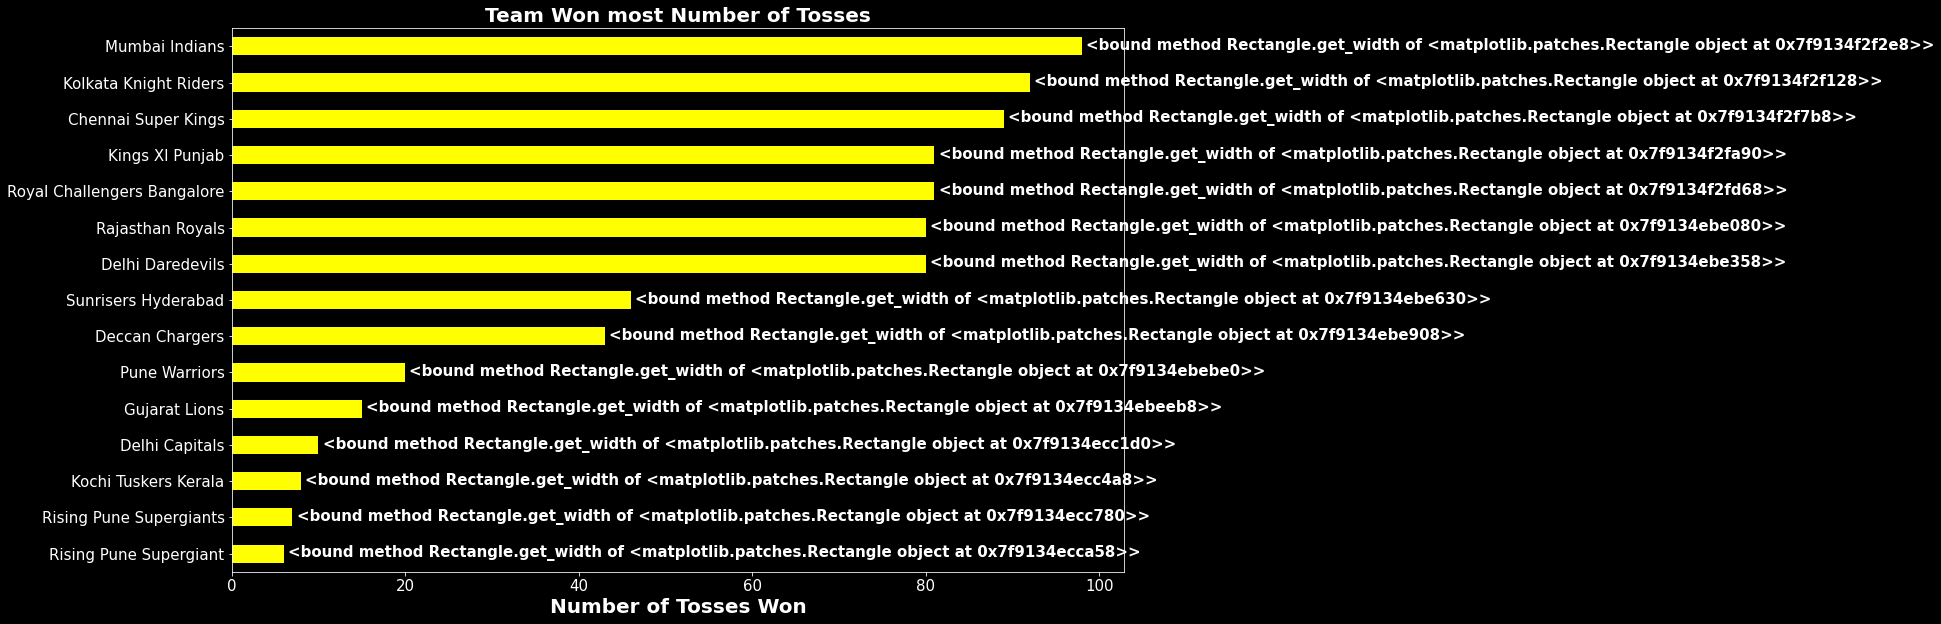

In [21]:
most_toss_win = most_toss_win.plot.barh(figsize=(16,10),color='yellow',fontsize=15)
plt.style.use('dark_background')
most_toss_win.set_title('Team Won most Number of Tosses',fontsize=20,fontweight='bold')
most_toss_win.set_xlabel('Number of Tosses Won',fontsize=20,fontweight='bold')
most_toss_win.invert_yaxis()
for i in most_toss_win.patches:
    most_toss_win.text(i.get_width()+.5,i.get_y()+.35,i.get_width,color='white',fontsize=15,fontweight='bold')

In [22]:
toss_decision = data_m['toss_decision'].value_counts()
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

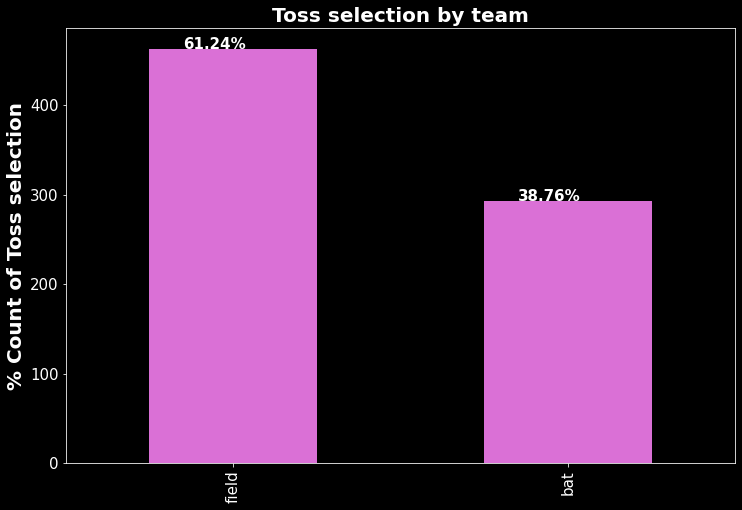

In [23]:
toss_decision = toss_decision.plot(kind='bar',figsize=(12,8),color='orchid',fontsize=15)
plt.style.use('dark_background')
toss_decision.set_title('Toss selection by team',fontsize=20,fontweight='bold')
toss_decision.set_ylabel('% Count of Toss selection',fontsize=20,fontweight='bold')
totals = []
for i in toss_decision.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in toss_decision.patches:
    toss_decision.text(i.get_x()+.10,i.get_height()+.01,
                      str(round((i.get_height()/total)*100,2))+'%',
                      color='white',fontsize=15,fontweight='bold')


In [24]:
most_win_batting_fast = data_m.winner[data_m.win_by_runs !=0].value_counts()
most_win_batting_fast

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

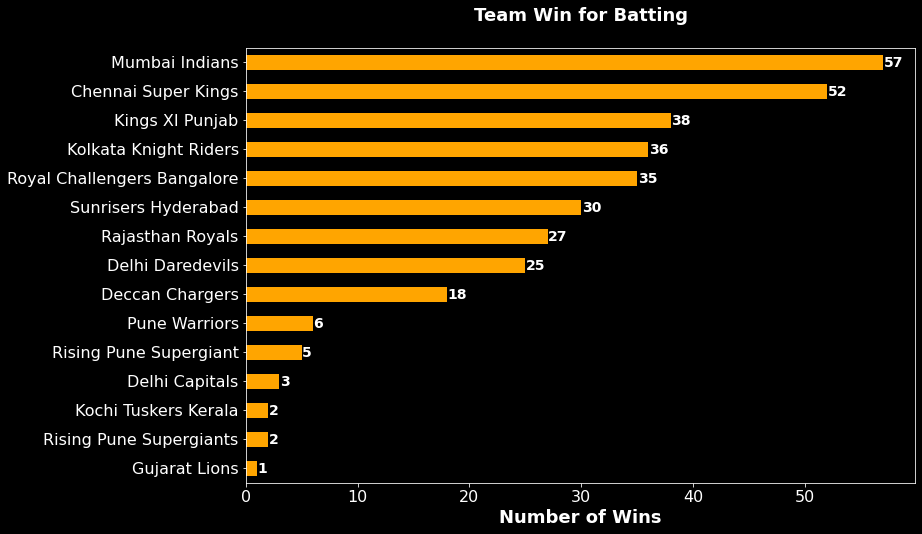

In [25]:
most_win_batting_fast = most_win_batting_fast.plot(kind='barh',color='orange',figsize=(12,8),fontsize=16)
plt.style.use('dark_background')
most_win_batting_fast.set_title('Team Win for Batting\n',fontsize=18,fontweight='bold')
most_win_batting_fast.set_xlabel('Number of Wins',fontsize=18,fontweight='bold')
most_win_batting_fast.invert_yaxis()
for i in most_win_batting_fast.patches:
    most_win_batting_fast.text(i.get_width()+.05,i.get_y()+.40,
                               i.get_width(),color='white',fontsize=14,fontweight='bold')
    

In [26]:
most_win_batting_second = data_m.winner[data_m.win_by_wickets !=0].value_counts()
most_win_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

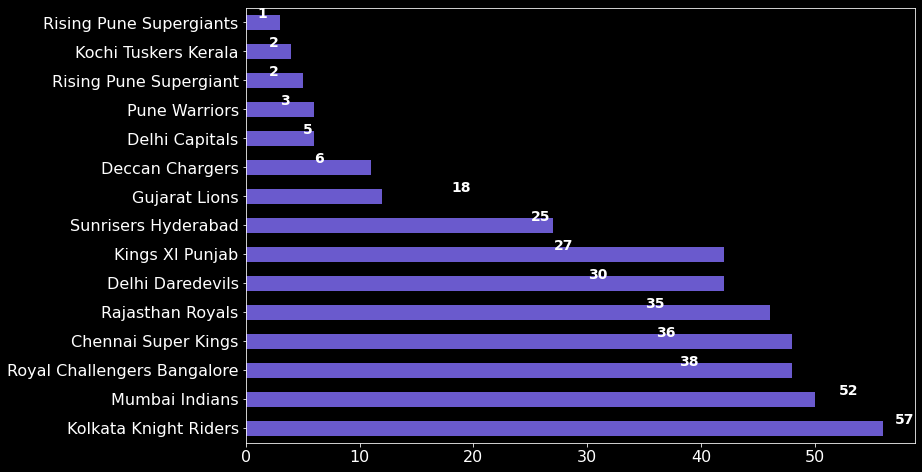

In [27]:
most_win_batting_second = most_win_batting_second.plot(kind='barh',color='slateblue',figsize=(12,8),fontsize=16)
plt.style.use('dark_background')
most_win_batting_fast.set_title('Team Win for Batting Second\n',fontsize=18,fontweight='bold')
most_win_batting_fast.set_xlabel('Number of Wins',fontsize=18,fontweight='bold')
most_win_batting_fast.invert_yaxis()
for i in most_win_batting_fast.patches:
    most_win_batting_second.text(i.get_width()+.05,i.get_y()+.40,
                               i.get_width(),color='white',fontsize=14,fontweight='bold')

### Analysis of IPL Team:
  #### Total 14 Teams participated over 11 years out of only 6 teams managed to win 6 IPL Title.
  #### Mumbai Indians is the most  successful team in IPL History(wins most number of Titles(4)) and most number of matches win Chennai Super Kings 
  #### From Toss Analysis it is clear that Top 3 most successful teams also won maximum number of tosses.
  #### Mumbai Indians is the most  successful team Defending Target 
  #### Kolkata Knight Riders is the most successful team while chasing the target.

### Analysis of IPL Players

In [28]:
most_player_match = data_m['player_of_match'].value_counts()[0:10]
most_player_match

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

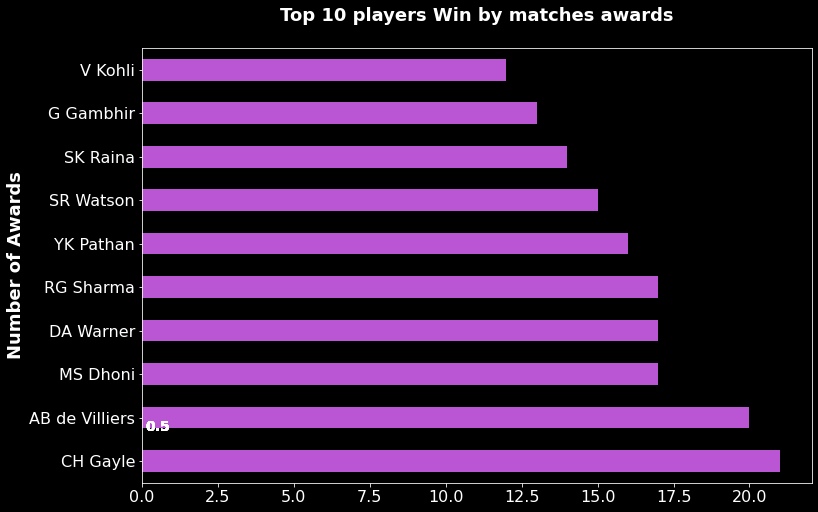

In [29]:
most_player_match = most_player_match.plot(kind='barh',color='mediumorchid',figsize=(12,8),fontsize=16)
plt.style.use('dark_background')
most_player_match.set_title('Top 10 players Win by matches awards\n',fontsize=18,fontweight='bold')
most_player_match.set_ylabel('Number of Awards',fontsize=18,fontweight='bold')

for i in most_player_match.patches:
    most_player_match.text(i.get_x()+.10,i.get_height()+.20,
                               i.get_height(),color='white',fontsize=14,fontweight='bold') 

In [30]:
batters = len(data_d['batsman'].unique())
print(f'Total number of batsman who at least bats for 1 ball: ',{batters})

Total number of batsman who at least bats for 1 ball:  {516}


In [31]:
bowlers = len(data_d['bowler'].unique())
print(f'Total number of bowlers who at least ball for 1 times: ',{bowlers})

Total number of bowlers who at least ball for 1 times:  {405}


In [32]:
played_most_deliveries = data_d['batsman'].value_counts()[0:10]
played_most_deliveries

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

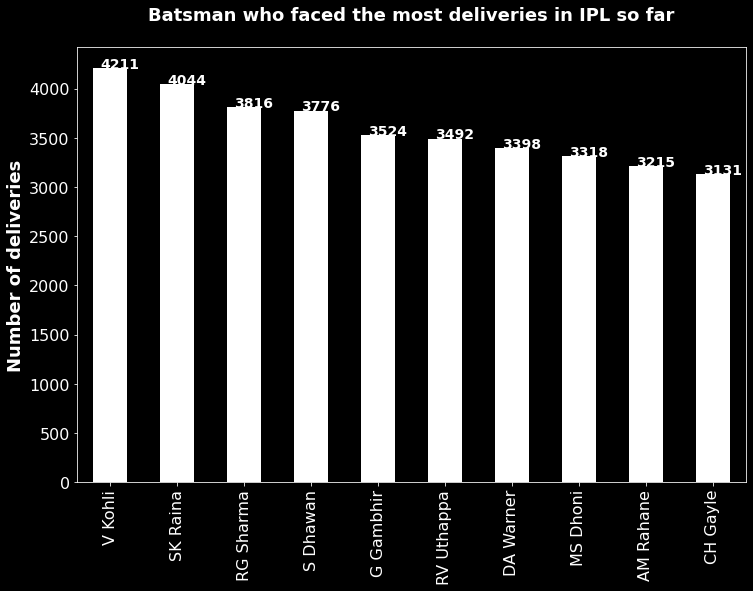

In [33]:
played_most_deliveries = played_most_deliveries.plot(kind='bar',color='white',figsize=(12,8),fontsize=16)
plt.style.use('dark_background')
played_most_deliveries.set_title('Batsman who faced the most deliveries in IPL so far\n',fontsize=18,fontweight='bold')
played_most_deliveries.set_ylabel('Number of deliveries',fontsize=18,fontweight='bold')

for i in played_most_deliveries.patches:
    played_most_deliveries.text(i.get_x()+.10,i.get_height()+.20,
                               i.get_height(),color='white',fontsize=14,fontweight='bold') 

In [34]:
bowl_most_deliveries = data_d['bowler'].value_counts()[0:10]
bowl_most_deliveries

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

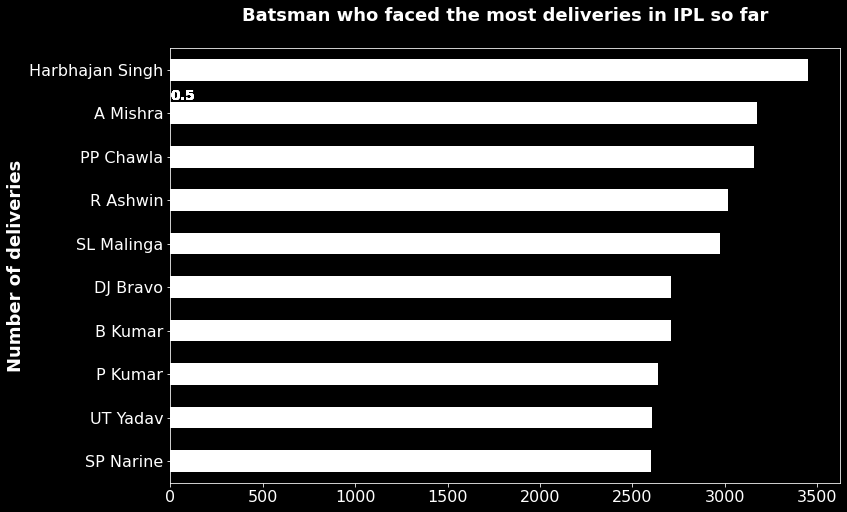

In [35]:
bowl_most_deliveries = bowl_most_deliveries.plot(kind='barh',color='white',figsize=(12,8),fontsize=16)
plt.style.use('dark_background')
bowl_most_deliveries.set_title('Batsman who faced the most deliveries in IPL so far\n',fontsize=18,fontweight='bold')
bowl_most_deliveries.set_ylabel('Number of deliveries',fontsize=18,fontweight='bold')
bowl_most_deliveries.invert_yaxis()
for i in bowl_most_deliveries.patches:
    bowl_most_deliveries.text(i.get_x()+.10,i.get_height()+.20,
                               i.get_height(),color='white',fontsize=14,fontweight='bold')

In [36]:
top5_run_getter =data_d.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[0:15]
top5_run_getter


batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
Name: batsman_runs, dtype: int64

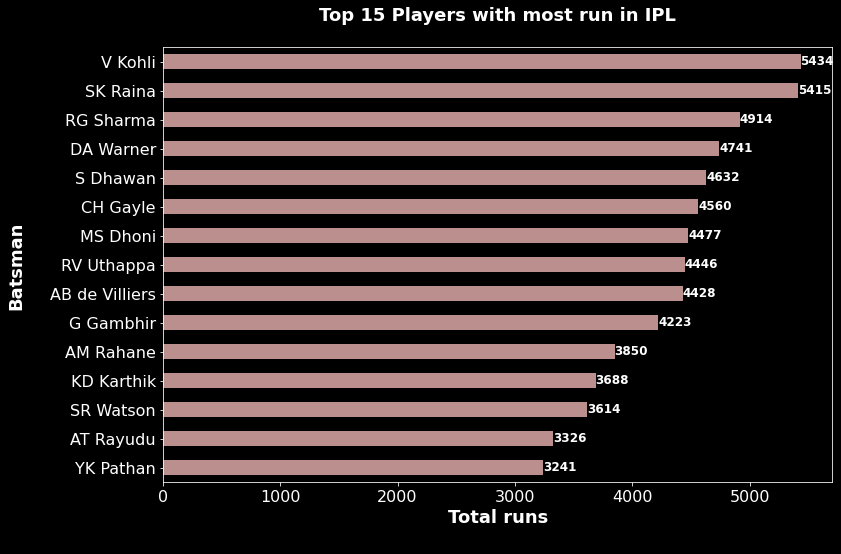

In [37]:
top5_run_getter = top5_run_getter.plot(kind='barh',color='rosybrown',figsize=(12,8),fontsize=16)
plt.style.use('dark_background')
top5_run_getter.set_title('Top 15 Players with most run in IPL\n',fontsize=18,fontweight='bold')
top5_run_getter.set_xlabel('Total runs\n',fontsize=18,fontweight='bold')
top5_run_getter.set_ylabel('Batsman\n',fontsize=18,fontweight='bold')
top5_run_getter.invert_yaxis()
for i in top5_run_getter.patches:
    top5_run_getter.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=12,fontweight='bold')

In [38]:
df = pd.merge(data_m,data_d,left_on='id',right_on='match_id')

In [39]:
kohli = df[df['batsman']=='V Kohli']
kohli = kohli.groupby('season')['batsman_runs'].sum()
kohli
#kohli = kohli.groupby('season')['batsman_runs'].sum()
#kohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

In [40]:
skraina = df[df['batsman']=='SK Raina']
skraina = skraina.groupby('season')['batsman_runs'].sum()
skraina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

In [41]:
rgsharma = df[df['batsman']=='RG Sharma']
rgsharma = rgsharma.groupby('season')['batsman_runs'].sum()
rgsharma

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

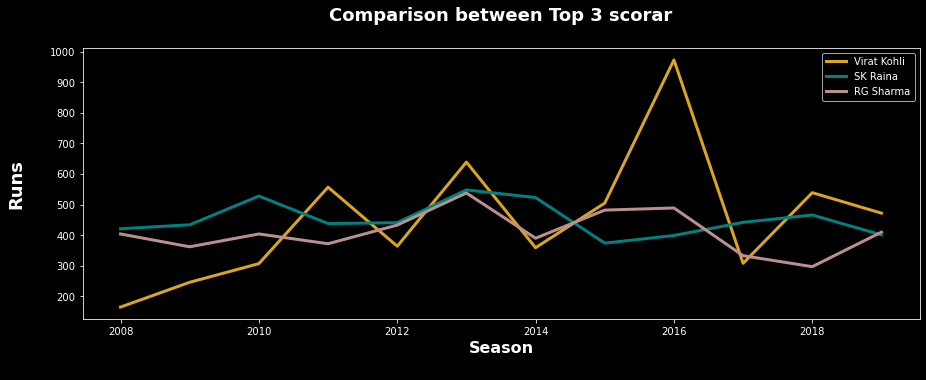

In [42]:
kohli.plot(kind='line',linewidth=3,figsize=(15,5),color='goldenrod',label='Virat Kohli')
skraina.plot(kind='line',linewidth=3,figsize=(15,5),color='teal',label='SK Raina')
rgsharma.plot(kind='line',linewidth=3,figsize=(15,5),color='rosybrown',label='RG Sharma')
plt.style.use('dark_background')
plt.title('Comparison between Top 3 scorar\n',fontsize=18,fontweight='bold')
plt.xlabel('Season\n',fontsize=16,fontweight='bold')
plt.ylabel('Runs\n',fontsize=18,fontweight='bold')
plt.legend()
plt.show()

#### Froms this:
#### SK Raina is the most consistent player 
#### RG Sharma is also consistent but not like SK Raina
#### Virat Kohli didn't started well in IPL but there are sharp raise and most successful season was 2016 . Also he is the least consistent player.

In [43]:
extra_runs = data_d.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False)[0:10]
extra_runs

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
SR Watson          171
DW Steyn           171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

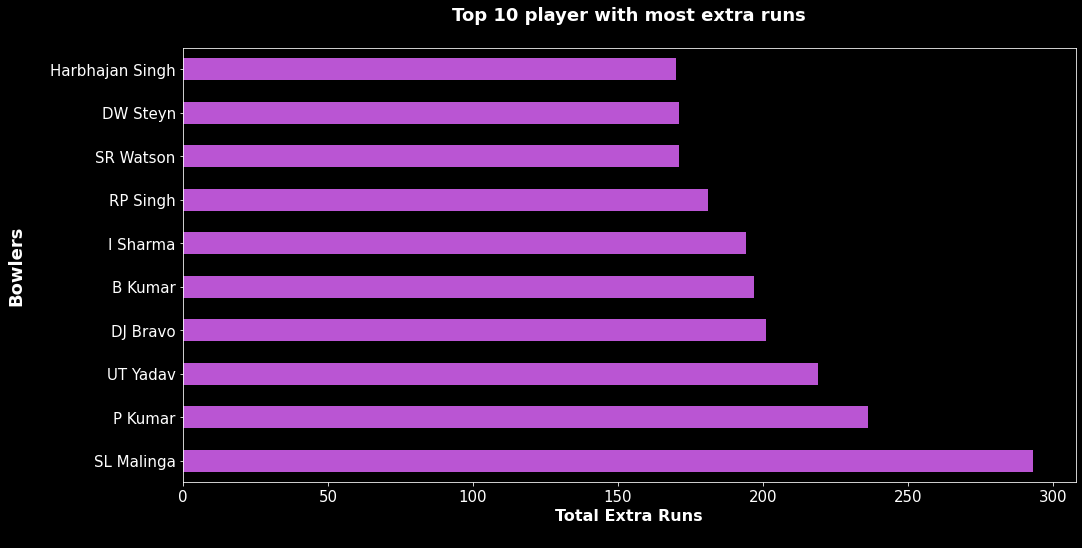

In [44]:
extra_runs = extra_runs.plot(kind='barh',figsize=(16,8),color='mediumorchid',fontsize=15)
plt.style.use('dark_background')
extra_runs.set_title('Top 10 player with most extra runs\n',fontsize=18,fontweight='bold')
extra_runs.set_xlabel('Total Extra Runs\n',fontsize=16,fontweight='bold')
extra_runs.set_ylabel('Bowlers\n',fontsize=18,fontweight='bold')
top5_run_getter.invert_yaxis()
for i in top5_run_getter.patches:
    top5_run_getter.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')


#### SL Malinga conceded the most extra runs in IPL History

In [45]:
bowl_bat = data_d.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False)[0:15]
bowl_bat

bowler           player_dismissed
Z Khan           MS Dhoni            7
PP Ojha          MS Dhoni            7
R Vinay Kumar    RG Sharma           6
B Kumar          AM Rahane           6
MM Sharma        AT Rayudu           6
A Mishra         RG Sharma           6
A Nehra          V Kohli             6
SP Narine        RG Sharma           6
PP Chawla        AT Rayudu           6
R Ashwin         RV Uthappa          6
B Kumar          PA Patel            6
Z Khan           G Gambhir           6
AR Patel         SR Watson           5
A Mishra         RV Uthappa          5
Harbhajan Singh  SK Raina            5
Name: player_dismissed, dtype: int64

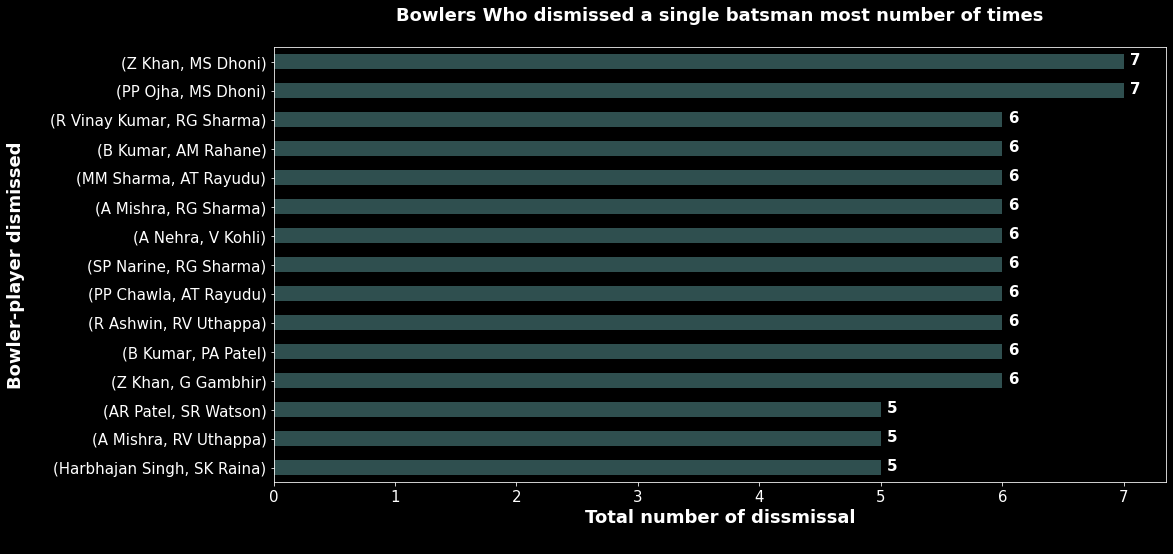

In [46]:
bowl_bat = bowl_bat.plot(kind='barh',figsize=(16,8),color='darkslategrey',fontsize=15)
plt.style.use('dark_background')
bowl_bat.set_title('Bowlers Who dismissed a single batsman most number of times\n',fontsize=18,fontweight='bold')
bowl_bat.set_xlabel('Total number of dissmissal\n',fontsize=18,fontweight='bold')
bowl_bat.set_ylabel('Bowler-player dismissed\n',fontsize=18,fontweight='bold')
bowl_bat.invert_yaxis()
for i in bowl_bat.patches:
    bowl_bat.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')

In [47]:
got_dismissed = data_d['player_dismissed'].value_counts()[:10]
got_dismissed

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
G Gambhir     136
KD Karthik    135
PA Patel      126
AM Rahane     116
SR Watson     115
Name: player_dismissed, dtype: int64

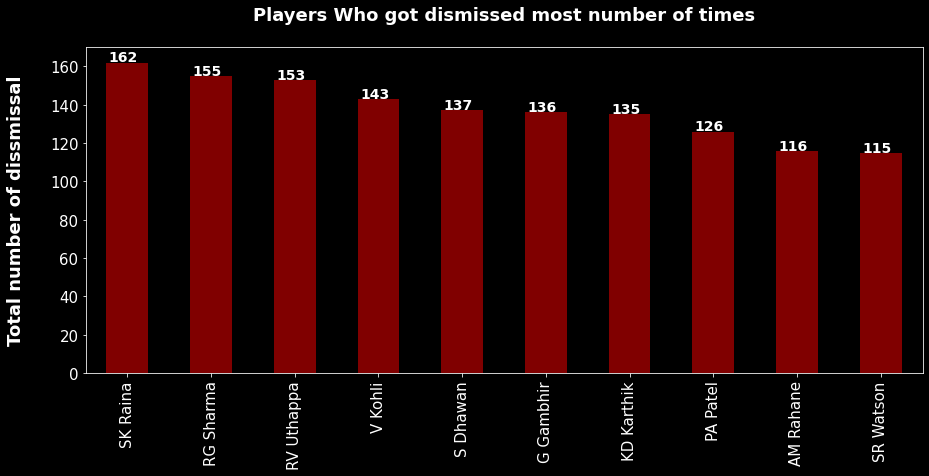

In [48]:
got_dismissed = got_dismissed.plot(kind='bar',figsize=(15,6),color='maroon',fontsize=15)
plt.style.use('dark_background')
got_dismissed.set_title('Players Who got dismissed most number of times\n',fontsize=18,fontweight='bold')
got_dismissed.set_ylabel('Total number of dissmissal\n',fontsize=18,fontweight='bold')

for i in got_dismissed.patches:
    got_dismissed.text(i.get_x()+.03,i.get_height()+.60,
                               i.get_height(),color='white',fontsize=14,fontweight='bold')

#### SK Raina got out(162) The most of the history in IPL followed by RG Sharma (155 )and RV Uthappa (153)

In [49]:
most_dot_by_bowlers = data_d.bowler[data_d.total_runs == 0].value_counts()[:10]
most_dot_by_bowlers

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

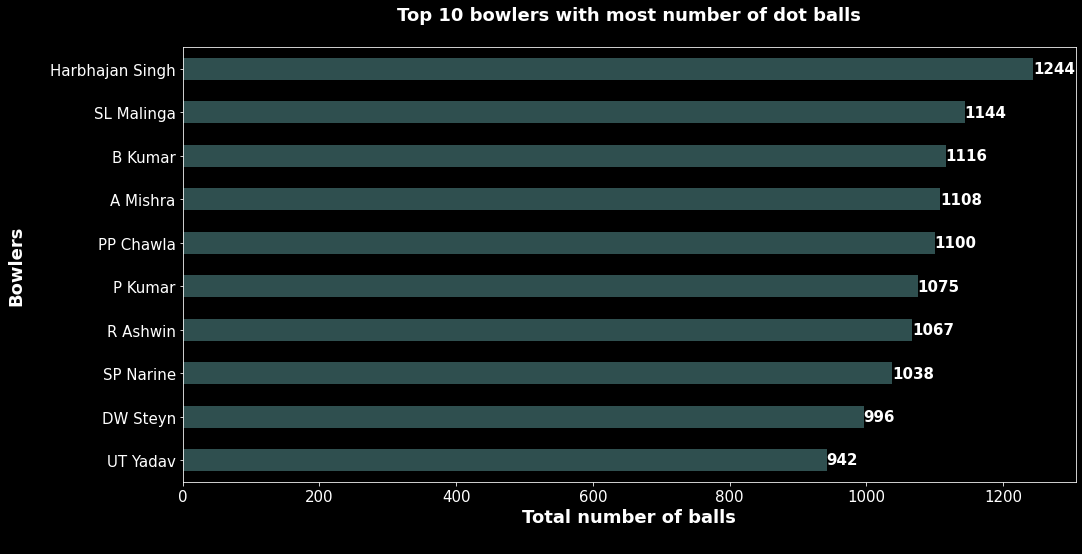

In [50]:
most_dot_by_bowlers= most_dot_by_bowlers.plot(kind='barh',figsize=(16,8),color='darkslategrey',fontsize=15)
plt.style.use('dark_background')
most_dot_by_bowlers.set_title('Top 10 bowlers with most number of dot balls\n',fontsize=18,fontweight='bold')
most_dot_by_bowlers.set_xlabel('Total number of balls\n',fontsize=18,fontweight='bold')
most_dot_by_bowlers.set_ylabel('Bowlers\n',fontsize=18,fontweight='bold')
most_dot_by_bowlers.invert_yaxis()
for i in most_dot_by_bowlers.patches:
    most_dot_by_bowlers.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')

  ###                                        Top 10 players involves in most dismissal

In [51]:
most_dismissal_by_player = data_d['fielder'].value_counts()[:10]
most_dismissal_by_player


MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
WP Saha            82
Name: fielder, dtype: int64

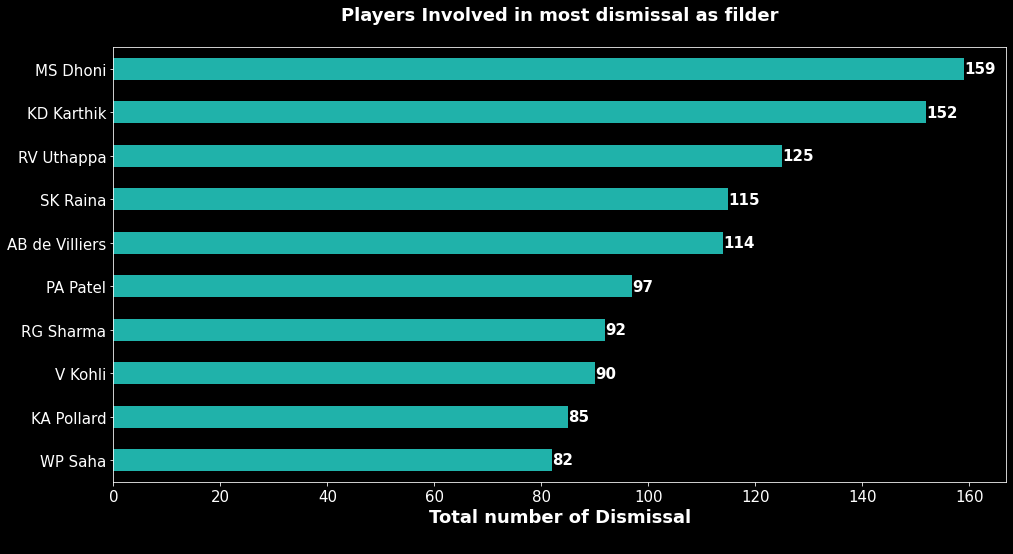

In [52]:
most_dismissal_by_player= most_dismissal_by_player.plot(kind='barh',figsize=(16,8),color='lightseagreen',fontsize=15)
plt.style.use('dark_background')
most_dismissal_by_player.set_title('Players Involved in most dismissal as filder\n',fontsize=18,fontweight='bold')
most_dismissal_by_player.set_xlabel('Total number of Dismissal\n',fontsize=18,fontweight='bold')
most_dismissal_by_player.invert_yaxis()
for i in most_dismissal_by_player.patches:
    most_dismissal_by_player.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')

#### Viral Kohli is top of 15 player with 5434 followed by Suresh Raina 5415 and Rohit Sharma 4914
#### Match Awards are won by Cheris Gayel
#### Harbajan Sing bowled most deliveries and Viratkohli faced most deliveries
#### Harbajan Sing holds th record for most dot balls
#### SL Malinga collected most extra runs

### Top 10 venue Details 

In [53]:
venue_city = data_m.groupby('venue')['city'].value_counts().sort_values(ascending=False)[:10]
venue_city

venue                                       city      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
Feroz Shah Kotla                            Delhi         67
M Chinnaswamy Stadium                       Bangalore     66
Rajiv Gandhi International Stadium, Uppal   Hyderabad     56
MA Chidambaram Stadium, Chepauk             Chennai       49
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Maharashtra Cricket Association Stadium     Pune          21
Dr DY Patil Sports Academy                  Mumbai        17
Name: city, dtype: int64

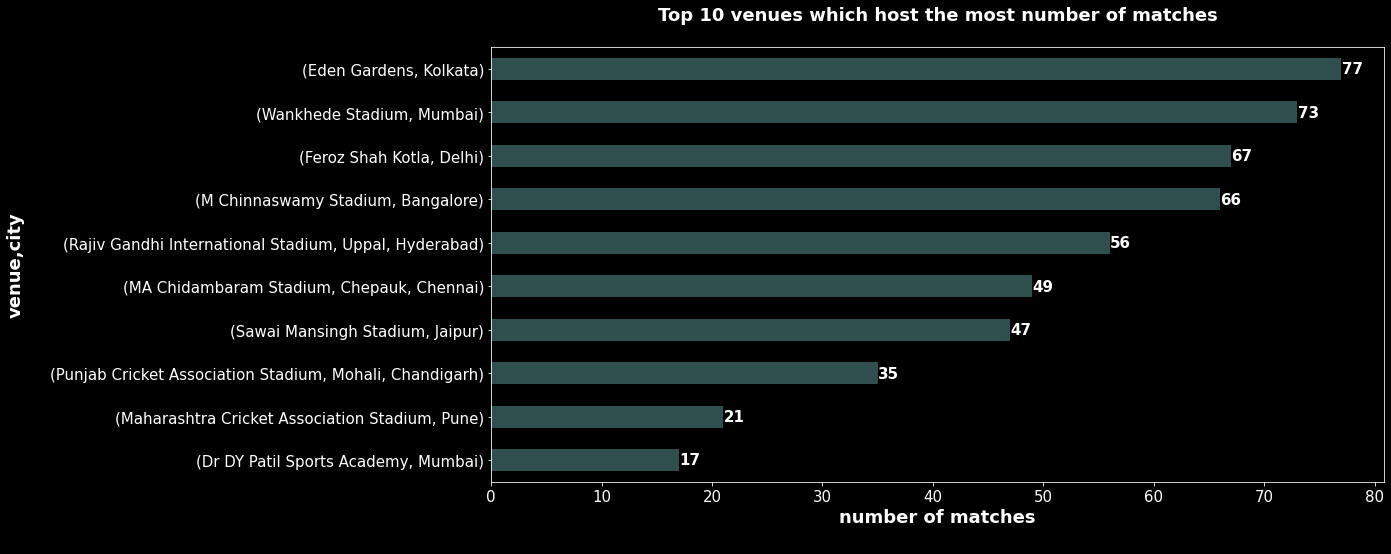

In [54]:
venue_city= venue_city.plot(kind='barh',figsize=(16,8),color='darkslategrey',fontsize=15)
plt.style.use('dark_background')
venue_city.set_title('Top 10 venues which host the most number of matches\n',fontsize=18,fontweight='bold')
venue_city.set_xlabel('number of matches\n',fontsize=18,fontweight='bold')
venue_city.set_ylabel('venue,city\n',fontsize=18,fontweight='bold')
venue_city.invert_yaxis()
for i in venue_city.patches:
    venue_city.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')

In [55]:
season_wise_match = data_m['season'].value_counts()
season_wise_match


2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

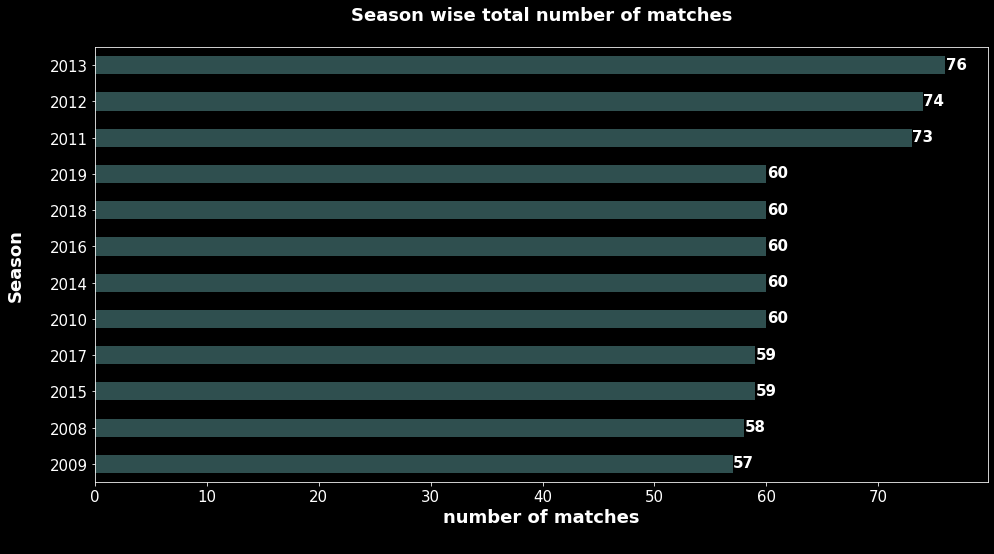

In [56]:
season_wise_match = season_wise_match.plot(kind='barh',figsize=(16,8),color='darkslategrey',fontsize=15)
plt.style.use('dark_background')
season_wise_match.set_title('Season wise total number of matches\n',fontsize=18,fontweight='bold')
season_wise_match.set_xlabel('number of matches\n',fontsize=18,fontweight='bold')
season_wise_match.set_ylabel('Season\n',fontsize=18,fontweight='bold')
season_wise_match.invert_yaxis()
for i in season_wise_match.patches:
    season_wise_match.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')

In [57]:
match_result = data_m['result'].value_counts()
match_result

normal       743
tie            9
no result      4
Name: result, dtype: int64

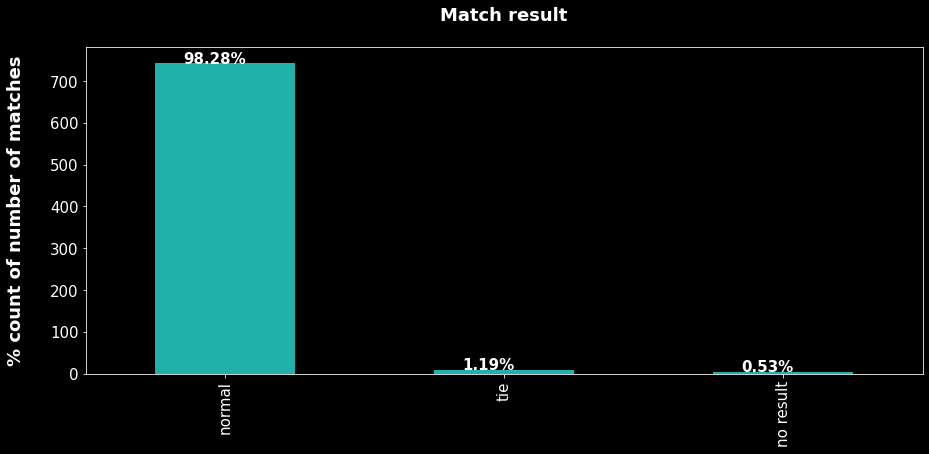

In [60]:
match_result = match_result.plot(kind='bar',figsize=(15,6),color='lightseagreen',fontsize=15)
plt.style.use('dark_background')
match_result.set_title('Match result\n',fontsize=18,fontweight='bold')
match_result.set_ylabel('% count of number of matches\n',fontsize=18,fontweight='bold')

totals = []
for i in match_result.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in match_result.patches:
    match_result.text(i.get_x()+.10,i.get_height()+.01,
                      str(round((i.get_height()/total)*100,2))+'%',
                      color='white',fontsize=15,fontweight='bold')

#### 4 matches happend when there was no result

In [62]:
dl_rule = data_m['dl_applied'].value_counts()
dl_rule

0    737
1     19
Name: dl_applied, dtype: int64

In [63]:
dl_rule = data_m['dl_applied'].replace(to_replace=1,value='Applied',inplace=True)
dl_rule = data_m['dl_applied'].replace(to_replace=0,value='Not Applied',inplace=True)

In [65]:
dl_rule = data_m['dl_applied'].value_counts()
dl_rule

Not Applied    737
Applied         19
Name: dl_applied, dtype: int64

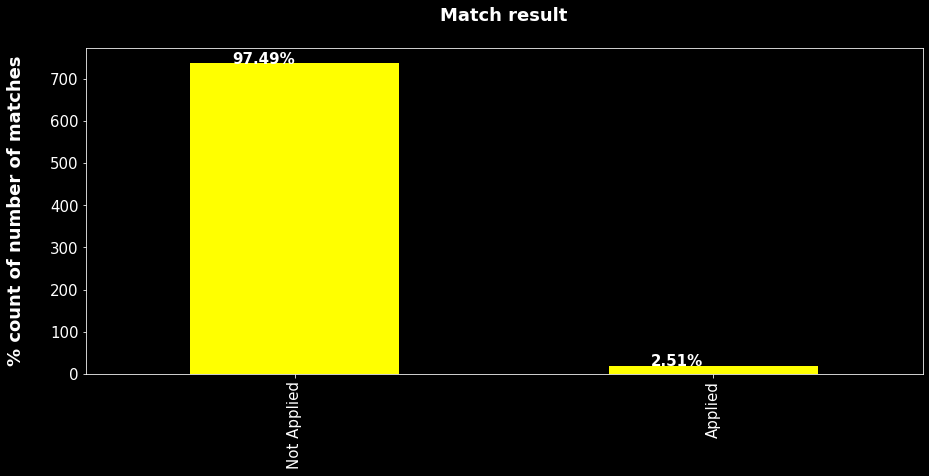

In [67]:
dl_rule = dl_rule.plot(kind='bar',figsize=(15,6),color='yellow',fontsize=15)
plt.style.use('dark_background')
dl_rule.set_title('Match result\n',fontsize=18,fontweight='bold')
dl_rule.set_ylabel('% count of number of matches\n',fontsize=18,fontweight='bold')

totals = []
for i in dl_rule.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in dl_rule.patches:
    dl_rule.text(i.get_x()+.10,i.get_height()+.01,
                      str(round((i.get_height()/total)*100,2))+'%',
                      color='white',fontsize=15,fontweight='bold')

In [69]:
dismissal_type = data_d['dismissal_kind'].value_counts()
dismissal_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

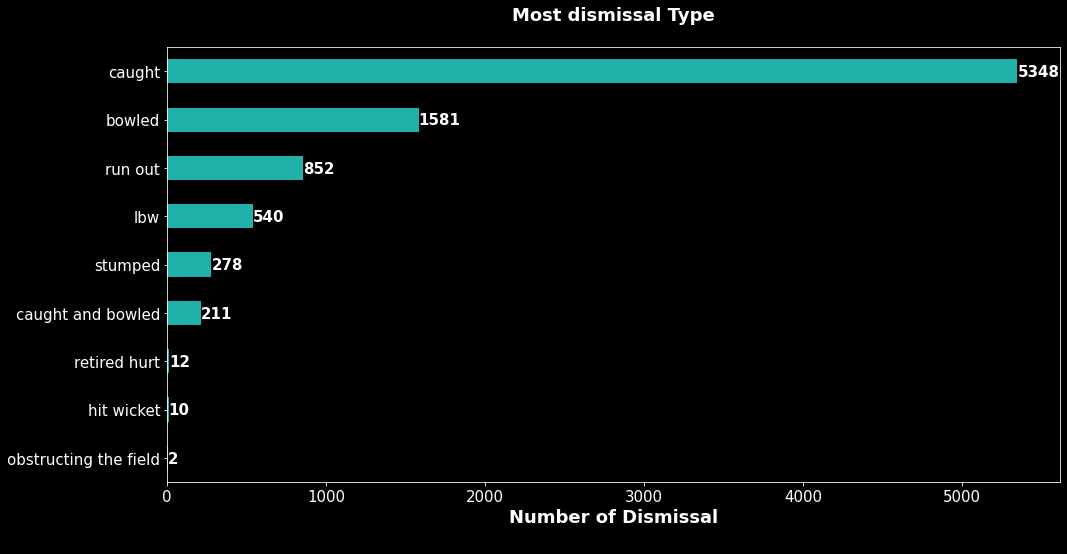

In [70]:
dismissal_type= dismissal_type.plot(kind='barh',figsize=(16,8),color='lightseagreen',fontsize=15)
plt.style.use('dark_background')
dismissal_type.set_title('Most dismissal Type\n',fontsize=18,fontweight='bold')
dismissal_type.set_xlabel('Number of Dismissal\n',fontsize=18,fontweight='bold')
dismissal_type.invert_yaxis()
for i in dismissal_type.patches:
    dismissal_type.text(i.get_width()+.05,i.get_y()+.35,
                               i.get_width(),color='white',fontsize=15,fontweight='bold')

In [71]:
super_over = data_d['is_super_over'].value_counts()
super_over

0    178997
1        81
Name: is_super_over, dtype: int64

In [73]:
super_over = data_d['is_super_over'].replace(to_replace=1,value='Yes',inplace=True)
super_over = data_d['is_super_over'].replace(to_replace=0,value='No',inplace=True)

In [74]:
super_over = data_d['is_super_over'].value_counts()
super_over

No     178997
Yes        81
Name: is_super_over, dtype: int64

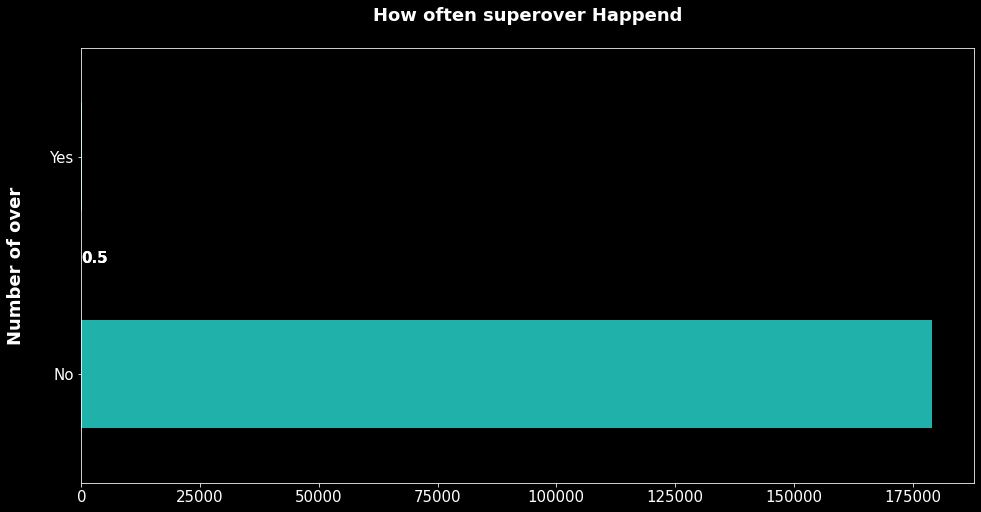

In [75]:
super_over= super_over.plot(kind='barh',figsize=(16,8),color='lightseagreen',fontsize=15)
plt.style.use('dark_background')
super_over.set_title('How often superover Happend\n',fontsize=18,fontweight='bold')
super_over.set_ylabel('Number of over\n',fontsize=18,fontweight='bold')

for i in super_over.patches:
    super_over.text(i.get_x()+.10,i.get_height()+.01,
                               (i.get_height()),color='white',fontsize=15,fontweight='bold')

#### 81 super over are played  in IPL History

In [76]:
close_match_by1run = data_m.win_by_runs[data_m.win_by_runs == 1].value_counts()
close_match_by1run

1    10
Name: win_by_runs, dtype: int64

In [77]:
close_match_by1run = data_m.winner[data_m.win_by_runs == 1].value_counts()
close_match_by1run

Mumbai Indians                 3
Royal Challengers Bangalore    2
Kings XI Punjab                2
Delhi Daredevils               1
Chennai Super Kings            1
Gujarat Lions                  1
Name: winner, dtype: int64

In [78]:
close_match_by1wicket = data_m.win_by_wickets[data_m.win_by_wickets == 1].value_counts()
close_match_by1wicket

1    3
Name: win_by_wickets, dtype: int64

In [79]:
close_match_by1wicket = data_m.winner[data_m.win_by_wickets == 1].value_counts()
close_match_by1wicket

Kolkata Knight Riders    1
Sunrisers Hyderabad      1
Chennai Super Kings      1
Name: winner, dtype: int64

### Thank You